<a href="https://colab.research.google.com/github/sira-code/DS-ML-PY-projects-/blob/master/INTERNSHALA_INTERNSHIP_TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#TASK 1:-

In [36]:
#2.WRITE A PYTHON FUNCTION WHICH TAKE A DATFRAME AS INPUT
   # AND DEALS WITH THE ISSUE OF OUTLIERS IN ALL THE CONTINOUS VARIABLES .

In [37]:
#IMPORTING THE NECCESSARY LIBRARIES:
import numpy as np #Numpy provides a tools to compute with and manipulate these arrays
import pandas as pd #Pandas is mainly used for data analysis and allows importing data
import matplotlib as plt #Matplotlib is a multi-platform data visualization library
import seaborn  as sns #Seaborn used to create more attractive and informative statistical graphics
%matplotlib inline

In [4]:
#LOAD THE DATASET
data=pd.read_csv('credit_card_general.csv')

In [38]:
#SHOW FIRST N ROWS
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [39]:
#SHOW THE DIMENSIONS OF THE DATAFRAME
data.shape

(8949, 18)

In [40]:
data.columns #This used to return the column labels of the given dataframe

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [41]:
data.describe(include='all')#this shows all the continuous variables

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
unique,8949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C11049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935
std,NaN,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,NaN,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000
75%,NaN,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000


In [42]:
list(set(data.columns)-set(data.describe().columns))# shows categorical variables

['CUST_ID']

In [43]:
data[data.columns[0]].isnull().value_counts() #this will give the column-wise sum of missing values

False    8949
Name: CUST_ID, dtype: int64

In [44]:
data.isnull().sum() # shows  the number of  missing values in the columns

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [45]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)# arrange the values in desending order

In [46]:
percent= ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

In [47]:
missing_data = pd.concat([total,percent],axis=1,keys=['TOTAL ','PERCENT'])
missing_data.head(20)

,TOTAL,PERCENT
TENURE,0,0.0
PRC_FULL_PAYMENT,0,0.0
BALANCE,0,0.0
BALANCE_FREQUENCY,0,0.0
PURCHASES,0,0.0
ONEOFF_PURCHASES,0,0.0
INSTALLMENTS_PURCHASES,0,0.0
CASH_ADVANCE,0,0.0
PURCHASES_FREQUENCY,0,0.0
ONEOFF_PURCHASES_FREQUENCY,0,0.0


In [48]:
#DEALING WITH OUTLIERS BY IMPUTE THEM:

In [70]:
from sklearn.impute import SimpleImputer 

In [71]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [72]:
imputer.fit(data[['MINIMUM_PAYMENTS']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [73]:
data['MINIMUM_PAYMENTS']=imputer.transform(data[['MINIMUM_PAYMENTS']])

In [75]:
#data.drop(5203,axis=0,inplace=True)

In [76]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [77]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [81]:
#OUTLIER TREATMENT
#An outlier is an observation that lies an abnormal distance from other values in a random sample
#from a population

In [82]:
q1= data.quantile(0.25)
q3= data.quantile(0.75)
iqr=q3-q1
lowerl= q1-(1.5*iqr)
upperl= q3+(1.5*iqr)

In [83]:
num= list()
for a in data.columns:
  if a in lowerl.index:
    num.append(a)
data=data[num]

In [84]:
df = data[-((data<(q1-1.5*iqr))|(data>(q3+1.5*iqr))).any(axis=1)]

In [85]:
df.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12
4,817.714335,1.000000,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12
7,1823.652743,1.000000,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.0,12
8,1014.926473,1.000000,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12
14,2772.772734,1.000000,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.0,12


In [86]:
#SOME BOXPLOTS FOR VISUALIZATION:-

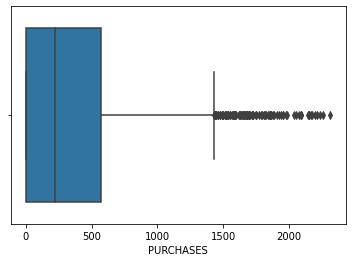

In [87]:
#plt.figure(figsize=(15,10))
sns.boxplot(df['PURCHASES'])

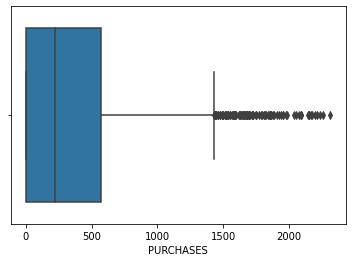

In [88]:
sns.boxplot(df['PURCHASES'])

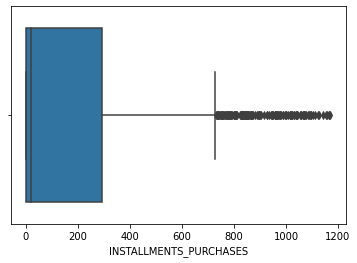

In [89]:
sns.boxplot(df['INSTALLMENTS_PURCHASES'])

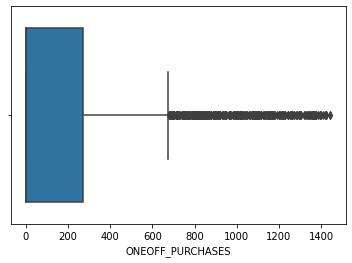

In [90]:
sns.boxplot(df['ONEOFF_PURCHASES'])

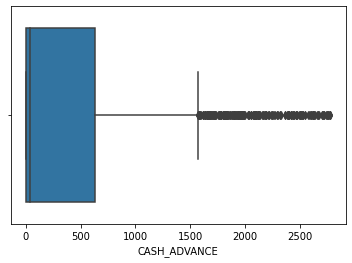

In [91]:
sns.boxplot(df['CASH_ADVANCE'])

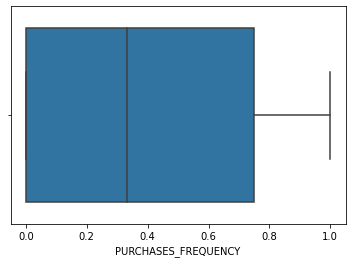

In [92]:
sns.boxplot(df['PURCHASES_FREQUENCY'])

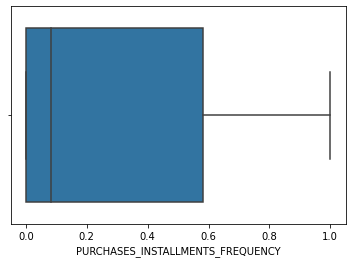

In [93]:
sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'])

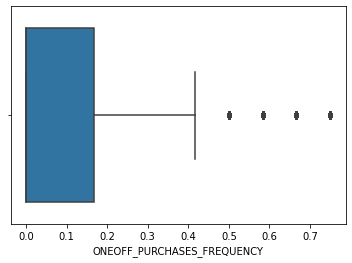

In [94]:
sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'])

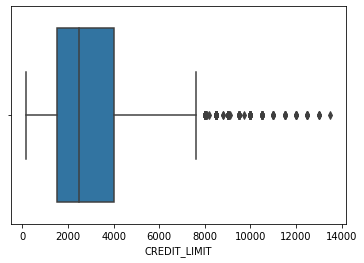

In [95]:
sns.boxplot(df['CREDIT_LIMIT'])

In [96]:
#3.WRITE A FUNCTION IN PYTHON THAT TAKE DATAFRAME AS INPUT AND DROP 
   # COLUMNS HAVING PEARSON CORREALATION MORE THAN 0.85

In [97]:
data.corr(method='pearson')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322335,0.181230,0.164326,0.126437,0.496679,-0.078054,0.073114,-0.063267,0.449246,0.385139,0.154297,0.531283,0.322769,0.397906,-0.319018,0.072421
BALANCE_FREQUENCY,0.322335,1.000000,0.133586,0.104257,0.124204,0.099312,0.229440,0.202295,0.175869,0.192022,0.141516,0.189527,0.095843,0.064842,0.131128,-0.095308,0.118566
PURCHASES,0.181230,0.133586,1.000000,0.916844,0.679889,-0.051495,0.392991,0.498413,0.315537,-0.120137,-0.067194,0.689552,0.356963,0.603252,0.095772,0.180356,0.086155
ONEOFF_PURCHASES,0.164326,0.104257,0.916844,1.000000,0.330610,-0.031341,0.264913,0.524881,0.127699,-0.082622,-0.046226,0.545514,0.319724,0.567283,0.050243,0.132745,0.064047
INSTALLMENTS_PURCHASES,0.126437,0.124204,0.679889,0.330610,1.000000,-0.064264,0.442398,0.214016,0.511334,-0.132312,-0.074017,0.628097,0.256499,0.384066,0.134003,0.182548,0.086016
CASH_ADVANCE,0.496679,0.099312,-0.051495,-0.031341,-0.064264,1.000000,-0.215579,-0.086786,-0.177118,0.628535,0.656493,-0.075877,0.303985,0.453226,0.140735,-0.152961,-0.068552
PURCHASES_FREQUENCY,-0.078054,0.229440,0.392991,0.264913,0.442398,-0.215579,1.000000,0.501305,0.862921,-0.308483,-0.203541,0.568408,0.119788,0.103393,0.006106,0.305761,0.061006
ONEOFF_PURCHASES_FREQUENCY,0.073114,0.202295,0.498413,0.524881,0.214016,-0.086786,0.501305,1.000000,0.142270,-0.111707,-0.069116,0.544849,0.295038,0.243503,-0.027339,0.157497,0.082234
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063267,0.175869,0.315537,0.127699,0.511334,-0.177118,0.862921,0.142270,1.000000,-0.262955,-0.169250,0.529949,0.060755,0.085496,0.032021,0.250049,0.072926
CASH_ADVANCE_FREQUENCY,0.449246,0.192022,-0.120137,-0.082622,-0.132312,0.628535,-0.308483,-0.111707,-0.262955,1.000000,0.799573,-0.131161,0.132616,0.183206,0.100624,-0.249768,-0.133427


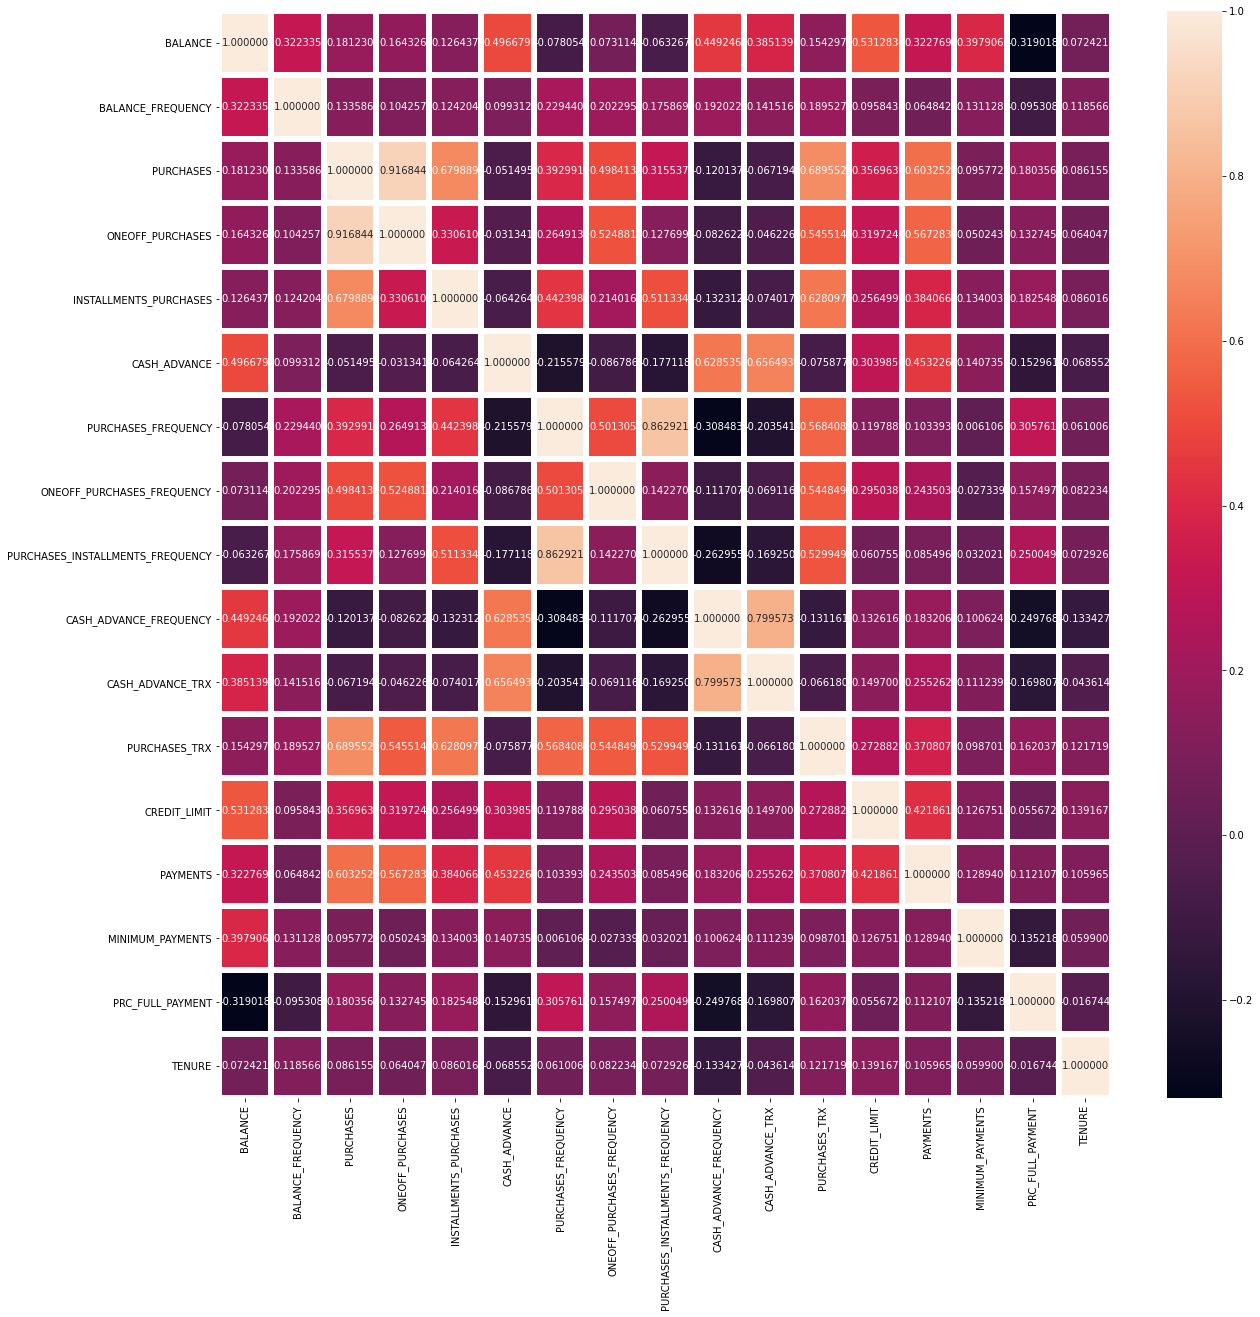

In [98]:
import matplotlib.pyplot as plt
f,ax= plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,linewidths=5,fmt='1f',ax=ax)
plt.show()

In [99]:
#CREATE CORRELATION MATRIX
corr_matrix= data.corr().abs()

In [100]:
print(corr_matrix)

                                   BALANCE  ...    TENURE
BALANCE                           1.000000  ...  0.072421
BALANCE_FREQUENCY                 0.322335  ...  0.118566
PURCHASES                         0.181230  ...  0.086155
ONEOFF_PURCHASES                  0.164326  ...  0.064047
INSTALLMENTS_PURCHASES            0.126437  ...  0.086016
CASH_ADVANCE                      0.496679  ...  0.068552
PURCHASES_FREQUENCY               0.078054  ...  0.061006
ONEOFF_PURCHASES_FREQUENCY        0.073114  ...  0.082234
PURCHASES_INSTALLMENTS_FREQUENCY  0.063267  ...  0.072926
CASH_ADVANCE_FREQUENCY            0.449246  ...  0.133427
CASH_ADVANCE_TRX                  0.385139  ...  0.043614
PURCHASES_TRX                     0.154297  ...  0.121719
CREDIT_LIMIT                      0.531283  ...  0.139167
PAYMENTS                          0.322769  ...  0.105965
MINIMUM_PAYMENTS                  0.397906  ...  0.059900
PRC_FULL_PAYMENT                  0.319018  ...  0.016744
TENURE        

In [101]:
#SELECT UPPER TRIANGLE OF CORRELATION MATRIX
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper)

                                  BALANCE  ...    TENURE
BALANCE                               NaN  ...  0.072421
BALANCE_FREQUENCY                     NaN  ...  0.118566
PURCHASES                             NaN  ...  0.086155
ONEOFF_PURCHASES                      NaN  ...  0.064047
INSTALLMENTS_PURCHASES                NaN  ...  0.086016
CASH_ADVANCE                          NaN  ...  0.068552
PURCHASES_FREQUENCY                   NaN  ...  0.061006
ONEOFF_PURCHASES_FREQUENCY            NaN  ...  0.082234
PURCHASES_INSTALLMENTS_FREQUENCY      NaN  ...  0.072926
CASH_ADVANCE_FREQUENCY                NaN  ...  0.133427
CASH_ADVANCE_TRX                      NaN  ...  0.043614
PURCHASES_TRX                         NaN  ...  0.121719
CREDIT_LIMIT                          NaN  ...  0.139167
PAYMENTS                              NaN  ...  0.105965
MINIMUM_PAYMENTS                      NaN  ...  0.059900
PRC_FULL_PAYMENT                      NaN  ...  0.016744
TENURE                         

In [102]:
#FIND THE COLUMNS HAVING PEARSON CORRELATION MORE THAN 0.85
to_drop=[column for column in upper.columns if any(upper[column]>0.85)]
print(to_drop)

['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']


In [103]:
#NOW DROP THAT COLUMNS
data1=data.drop(['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'], axis =1)
data1.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [104]:
data1.shape

(8949, 15)